# **COMPARISON QR ALGORITHMS FOR FINDING EIGENVALUES ON SYMMETRIC MATRICES**

Francesco Marrocco

# **Import dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

# **QR Algorithm**

Among the various algorithms for finding eigenvalues, the QR algorithm is certainly among the best known. This algorithm works by making use of the QR factorization of a matrix, that is, the decomposition of any matrix

$A=QR \quad A \epsilon \mathbb{R^{mxn}} \quad Q \epsilon \mathbb{R^{nxn}}$ orthogonal $\quad R \epsilon \mathbb{R^{mxn}}$ upper triangular

The construction of the factorization comes directly from the fact that imposing $span(a_1 , a_2, ... , a_n)=span(q_1 , q_2, ... , q_n)$ ($a_i$ column of $A$ and $q_i$ column of $Q$)

It comes immediately that $a_j = \sum_{i=1}^{n} r_{ij}q_{j}$. In the three methods I present I will study the various methods to obtain the matrix $R$ enclosing the $r_{ij}$ such that it is upper triangular.

As mentioned, in this notebook I will experiment with the efficiency of three algorithms to compute the QR factorization of a matrix. The three proposed algorithms correctly compute the QR factorization of any matrix, but will later be used in the tests only in computing the eigenvalues of symmetric matrices, in which the eigenvalues (all real) lie on the diagonal. The non-symmetric case, on the other hand, would generate blocks below the diagonal at the complex eigenvalues.

I initialize a symmetric matrix to verify the operation of the 3 algorithms

In [2]:
A = np.array([
    [5, 7, 5, 4],
    [7, 9, 3, 4],
    [5, 3, 1, 3],
    [4, 4, 3, 8]
])

# **QR with Gram-Schmidt**

The first algorithm is the Gram-Schmidt algorithm. It is generally used to find an orthonormal basis from a nonorthogonal basis. The vectors of the new basis are computed sequentially, looking for them to be orthonormal to all previous ones.

$A=[a_1|...|a_n]$

$v_1=a_1 \quad\quad q_1 = \frac{a_1}{||a_1||}$

$v_2=a_2-proj_{v_1}a_2=a_2-<a_2,q_1>q_1 \quad q_2 = \frac{a_2}{|a_2||}$

$v_n=a_n-\sum_{i=1}^n proj_{v_i}a_i \quad q_i = \frac{a_i}{|a_i|}$

The matrix R is equal to $R= \begin{bmatrix}<q_1,a_1> & <q_1,a_2> & ... & <q_1,a_n> \\ 0 & <q_2,a_2> & ... & <q_2,a_n> \\ ... &...& ...&...\\0&0&...&<q_n,a_n> \end{bmatrix}$

While $Q$ is $Q=[q_1|...|q_n]$ with $q_i$ orthonormal

In [3]:
def QR_Gram_Schmidt(A):
    m, n = A.shape
    A = A.astype(np.float64)
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for k in range(n):
        v_k = A[:, k]
        for i in range(k):
            R[i, k] = np.dot(Q[:, i], A[:, k])
            v_k = v_k - R[i, k] * Q[:, i]
        R[k, k] = np.linalg.norm(v_k)
        Q[:, k] = v_k / R[k, k]

    return Q, R

## *Computational cost*


*   `for k in range(n)` $\quad  ←\quad O(n)$
*   `for i in range(k)` $\quad  ←\quad O(n)$
*   `R[i, k] = np.dot(Q[:, i], A[:, k])`$\quad  ←\quad O(n)$




Total $O(n^3)$

## *Example*

In [4]:
Q, R = QR_Gram_Schmidt(A)
print(f"Q={Q}")
print(f"R={R}")

Q=[[ 0.4662524   0.43360593  0.59417901 -0.49147319]
 [ 0.65275337  0.35772489 -0.65131161  0.14744196]
 [ 0.4662524  -0.81301112 -0.0571326  -0.34403123]
 [ 0.37300192 -0.15176207  0.4684873   0.7863571 ]]
R=[[10.72380529 12.02931203  5.87478029  8.85879568]
 [ 0.          3.20868387  1.97290697 -0.48780667]
 [ 0.          0.          2.36528954  3.34797021]
 [ 0.          0.          0.          3.88263818]]


# **QR with Householder**

The second algorithm is one that makes use of Householder reflections, that is, performing transformations to the matrix $A$ aimed at deleting, at step $i$ the last $i$ elements of the column. The idea is that the matrix $H$ is a reflection matrix with respect to a vector $v$ and that therefore I can mirror the columns of $A$ to make them parallel to $e_1$ which gradually cancels only the last terms, hence upper triangular ($R$). The $n$ matrices $H$ that allow me this reflection will be $Q$

I know that the vectors on which I reflect are obtained as $v=a_i \pm ||a_i||e_1$ ( the $\pm$ is so that the first term does not cancel)

All that remains is for me to compute them one by one and reflect, i.e., the reflection matrix is $H=I-2 \frac{vv^T}{||v||_2^2}$ (it is well understood graphically)

In [5]:
def QR_Householder(A):
    m, n = A.shape
    A = A.astype(np.float64)
    Q = np.eye(m)
    R = A.copy()


    for j in range(n):
        a_n = np.linalg.norm(R[j:, j])
        if a_n == 0:
            continue
        s = -np.sign(R[j, j]) if R[j, j] != 0 else -1
        u1 = R[j, j] - s * a_n
        w = R[j:, j] / u1
        w[0] = 1
        tau = -s * u1 / a_n

        R[j:, :] = R[j:, :] - tau * np.outer(w, np.dot(w.T, R[j:, :]))

        Q[:, j:] = Q[:, j:] - np.outer(Q[:, j:] @ w, tau * w)

    return Q, R

## *Computational cost*



`for j in range(n)` $\quad \leftarrow \quad O(n)$


`R[j:, :] = R[j:, :] - tau * np.outer(w, np.dot(w.T, R[j:, :]))` $\quad \leftarrow \quad O(n^2)$


Total $O(n^3)$

## *Example*

In [6]:
Q, R = QR_Householder(A)
print(f"Q={Q}")
print(f"R={R}")

Q=[[-0.4662524  -0.43360593  0.59417901  0.49147319]
 [-0.65275337 -0.35772489 -0.65131161 -0.14744196]
 [-0.4662524   0.81301112 -0.0571326   0.34403123]
 [-0.37300192  0.15176207  0.4684873  -0.7863571 ]]
R=[[-1.07238053e+01 -1.20293120e+01 -5.87478029e+00 -8.85879568e+00]
 [-1.07732559e-15 -3.20868387e+00 -1.97290697e+00  4.87806669e-01]
 [-6.32899985e-17  0.00000000e+00  2.36528954e+00  3.34797021e+00]
 [ 6.42717481e-16  0.00000000e+00  0.00000000e+00 -3.88263818e+00]]


# **QR with Givens**

The last QR algorithm is one that makes use of Givenso rotations on a Hessenberg matrix (upper triangular with an extra column below the principal). By Schur factorization I know that any matrix $A$ can be written as $A=WTW^T$ com $W$ orthogonal and $T$ Hessenberg. The Hessenberg matrix is found by the same logic exposed for QR Householder, aiming to zero out all elements leaving only a diagonal below the principal. the Hessenberg matrix is similar to $A$.

I now aim to delete the elements of the subdiagonal, using Givens rotations. I consider $A_G$ matrix of Givens rotations and $x$ which is the vector composed of the element on the diagonal and the one directly below it

$A_{G}=\begin{bmatrix}cos \theta &sin \theta&cos \theta\end{bmatrix}$

$x=\begin{bmatrix}x_1\\x_2\end{bmatrix}$

I try to rotate $x$ until it becomes parallel to $e_1$.

It then turns out that:

$cos \theta = \frac{x_1}{\sqrt{x_1^2+x_2^2}}$

$sin \theta = \frac{x_2}{\sqrt{x_1^2+x_2^2}}$

By repeatedly applying this transformation to $A$ Hessenberg I get $R$ triangular upper. Instead $Q$ I get it by repeatedly applying $Q=G_{n-1}...G_1$

where $G_i=\begin{bmatrix}I&0&0\\0&A_G&0\\0&0&I \end{bmatrix}$

In [7]:
def hess(A):
    n = len(A)
    H = A.copy()
    H = A.astype(np.float64)

    for j in range(n-2):
        u = H[j+1:, j].copy()
        u[0] += np.sign(u[0]) * np.linalg.norm(u)
        v = u / np.linalg.norm(u)

        H[j+1:, :] -= 2 * np.outer(v, np.dot(v.T, H[j+1:, :]))
        H[:, j+1:] -= 2 * np.outer(np.dot(H[:, j+1:], v), v.T)

    return H

def givens(a, b):
    r = np.hypot(a, b)
    c = a / r
    s = b / r
    return c,s

def QR_Givens(A):
    A = A.copy()
    m = A.shape[0]
    A = A.astype(np.float64)
    Q = np.eye(m)

    for k in range(m-1):
        c,s = givens(A[k, k], A[k+1, k])
        G_k = np.array([[c, s],[-s,c]])
        A[k:k+2, :] = G_k @ A[k:k+2, :]
        Q[:, k:k+2] = Q[:, k:k+2] @ G_k.T

    return Q, A

## *Computational cost*

function `hess` $\quad \leftarrow \quad O(n^3)$

function `givens` $\quad \leftarrow \quad O(1)$

function `QR_Givens` $\quad \leftarrow \quad O(n^2)$




Therefore, if I were to apply `QR_Givens` many times, I would have to execute the `hess` function once in $n^3$ and then many times `QR_Givens` in $n^2$

## *Example*

In [8]:
A=hess(A)
Q, R = QR_Givens(A)
print(f"Q={Q}")
print(f"R={R}")

Q=[[ 0.4662524  -0.48373592 -0.57243985 -0.47002221]
 [-0.88465174 -0.25495121 -0.30170229 -0.24772345]
 [ 0.         -0.83725709  0.42260506  0.34699499]
 [ 0.          0.          0.63458121 -0.77285619]]
R=[[ 1.07238053e+01 -1.57074831e+01  3.31219384e+00  7.85728582e-16]
 [ 4.42302467e-16  4.47182268e+00 -3.26392660e-01 -1.57989544e+00]
 [ 5.63750093e-16  7.86160618e-17  2.97359833e+00  3.15461097e+00]
 [-1.89499385e-15 -5.10057290e-16  2.90187944e-17 -2.21600780e+00]]


It obviously has a different factorization from the previous ones because I am factoring an actually different matrix. `hess(A)` modifies the original matrix, creating a new one, Hessenberg and similar


# **Eigenvalue search**

This factorization is extremely useful when looking for eigenvalues. Indeed, knowing that $Q$ is orthogonal, so $Q^{-1}=Q^{T}$, and knowing that for $P$ invertible $A=P^{-1}BP$ is verified if $A$ and $B$ are similar (same eigenvalues), I can say that at each iteration of the algorithm, imposing $A_{k}=Q_{k}R_{k}$ and $A_{k+1}=R_{k}Q_{k}$

$A_{k+1}=R_{k}Q_{k}=Q_{k}^{T}A_{k}Q_{k}$ i.e., I am proceeding by applying orthogonal transformations to $A_{k$ thus keeping the eigenvalues unchanged for the proprtities seen before.

Therefore at step $i+1$:

$A_{i+1} = Q_{i}^{T}A_{i}Q_{i}=Q_{i}^{T}...Q_{1}^{T}A_1Q_{1}...Q_{i}$

I can call $P_i=Q_1...Q_{i}$ (orthogonal because product of orthogonal matrices) and thus $A_{i+1} = P_{i}^{T}A_{1}P_{i}$

At the same time the matrix $A$ can be written as $A=X\Lambda X^{-1}$ with $X=\begin{bmatrix} x_n & ... & x_1 \end{bmatrix}, x_i$ eigenvectors and $\Lambda = diag(\lambda_n, ..., \lambda_1), \lambda_i$ decreasing ordered eigenvalues.

Since a QR factorization exists for every matrix, it also exists for $X = QR$ and thus:

$A = QR\Lambda R^{-1}Q^T ⇒ Q^TAQ=R\Lambda R^{-1}$ and therefore since $R\Lambda R^{-1}$ is product of upper triangular matrices $Q^TAQ$ is upper triangular

Now I just need to prove that for $i\rightarrow ∞$

$P_{i}^{T}A_{1}P_{i}=Q^TAQ$

That is, that $P_{i}\rightarrow Q$ for $i \rightarrow \infty$

To prove this I define $U_i = R_iR_{i-1}...R_1$ and thus $P_iU_i = Q_1...Q_iR_i...R_1 = Q_1...Q_{i-1}A_iR_{i-1}...R_1 = P_{i-1}A_iU_{i-1}$

But I also know that $A_i=P_{i-1}^{T}A_{1}P_{i-1}$

$P_iU_i = P_{i-1}A_iU_{i-1} = P_{i-1}P_{i-1}^{T}A_{1}P_{i-1}U_{i-1}=A_{1}P_{i-1}U_{i-1}$

$P_iU_i=A_{1}P_{i-1}U_{i-1}$

Iterating knowing that $P_1U_1=A_{1}P_{0}U_{0}$ I get that $P_iU_i=(A_{1})^{i-1}P_{1}U_{1}=(A_{1})^{i-1}Q_{1}R_{1}=A^{i}$

$P_iU_i=A^{i}$

At the same time $A=X\Lambda X^{-1}$ and so $A^i=(X\Lambda X^{-1})...(X\Lambda X^{-1})=X\Lambda ^i X^{-1}$

I again use the fact that $X=QR$ and decompose LU $X^{-1}=LU$ With $L$ lower triangular and $U$ upper triangular. Therefore:

$A^i=QR \Lambda^i LU = QR \Lambda^i L \Lambda^{-1} \Lambda^i U = QR(\Lambda^i L \Lambda^{-i}) \Lambda^i U$

$\Rightarrow P_iU_i=QR(\Lambda^i L \Lambda^{-i}) \Lambda^i U$

Now, if $\Lambda^i L \Lambda^{-i} = I$ I would be finished since I could identify $U_i=R \Lambda^i U$ since it is a product between upper triangles and $P_i=Q$ proving what we set out to do at the beginning.

Therefore, $\Lambda^i L \Lambda^{-i} = I$ ?

I note that $\Lambda^i L \Lambda^{-i}$ is lower triangular and that the element at position $i,j$ is less than one for $i>j$ (since I had originally taken $\Lambda$ with decreasingly ordered eigenvalues, I can say that for $i→∞$

$\Lambda^i L \Lambda^{-i} = I$

Proving that $\lim_{i→∞}A_i=Q^TAQ$ i.e., that $A_i$ converges to an upper triangular matrix with eigenvalues on the diagonal

Rutgers University: MATH 574 LECTURE NOTES, Theorem 22

https://sites.math.rutgers.edu/~falk/math574/lecture9.pdf

In [9]:
def Autovalori_QR(func, A, itmax, tol):
    if func!=QR_Gram_Schmidt: A = hess(A)
    i , t = 0, float('inf')
    A = A.astype(np.float64)
    if itmax == float('inf'):
        while t > tol:
            Q, R = func(A)
            Ak = R@Q
            t = np.linalg.norm(A - Ak)
            A = Ak
            i += 1

    elif tol == float('inf'):
        for i in range(itmax):
            Q, R = func(A)
            A = R@Q

    else:
        t = float('inf')
        i = 0
        while i < itmax and t > tol:
            Q, R = func(A)
            Ak = R@Q
            t = np.linalg.norm(A - Ak)
            A = Ak
            i += 1
    autovalori = np.diag(A)
    return autovalori, t, i

# **Convergence speed comparison**


## *Fixed itmax and compare the time as n increases:*

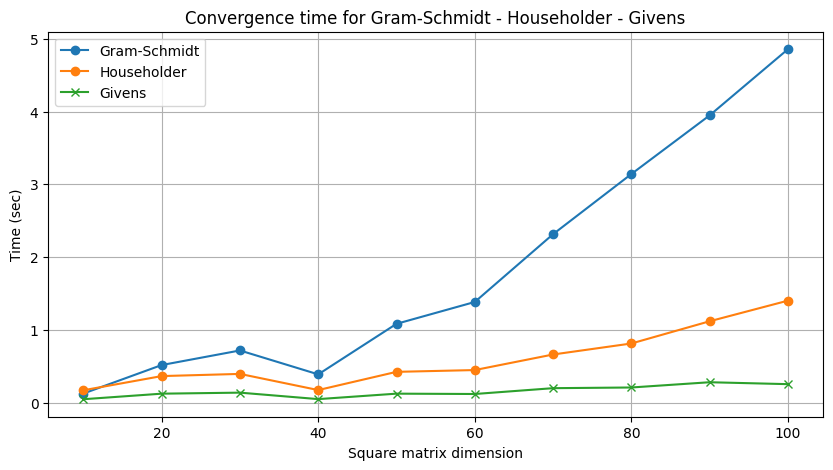

In [10]:
time_gram_schmidt = []
time_householder = []
time_givens = []
dimensioni = [i for i in range(10, 110, 10)]
itmax = 100

for n in dimensioni:
    time_gram_schmidt1 = []
    time_householder1 = []
    time_givens1 = []
    time_base1 = []
    for i in range(10):
        A = np.random.rand(n, n)
        A_simm = A.T + A
        start_time = time.time()
        Autovalori_QR(QR_Gram_Schmidt, A, itmax, float('inf'))
        end_time = time.time()
        time_gram_schmidt1.append(end_time - start_time)
        start_time = time.time()
        Autovalori_QR(QR_Householder, A_simm, itmax, float('inf'))
        end_time = time.time()
        time_householder1.append(end_time - start_time)
        start_time = time.time()
        Autovalori_QR(QR_Givens, A_simm, itmax, float('inf'))
        end_time = time.time()
        time_givens1.append(end_time - start_time)

    time_gram_schmidt.append(np.mean(time_gram_schmidt1))
    time_householder.append(np.mean(time_householder1))
    time_givens.append(np.mean(time_givens1))

plt.figure(figsize=(10, 5))
plt.plot(dimensioni, time_gram_schmidt, label='Gram-Schmidt', marker='o')
plt.plot(dimensioni, time_householder, label='Householder', marker='o')
plt.plot(dimensioni, time_givens, label='Givens', marker='x')
plt.xlabel('Square matrix dimension')
plt.ylabel('Time (sec)')
plt.title('Convergence time for Gram-Schmidt - Householder - Givens')
plt.legend()
plt.grid(True)
plt.show()

## *Fixed t and itmax comparison*

In [ ]:
iter_gram_schmidt = []
iter_householder = []
iter_givens = []
dimensioni = [i for i in range(3, 33, 5)]
tol = 1e-3
B = []

for n in tqdm(dimensioni):
    iter_gram_schmidt1 = []
    iter_householder1 = []
    iter_givens1 = []
    for _ in range(10):
        A = np.random.rand(n, n) * 10
        A_simm = A.T + A
        i1 = Autovalori_QR(QR_Gram_Schmidt,A_simm, float('inf'), tol)[2]
        iter_gram_schmidt1.append(i1)
        i2 = Autovalori_QR(QR_Householder,A_simm, float('inf'), tol)[2]
        iter_householder1.append(i2)
        i3 = Autovalori_QR(QR_Givens,A_simm, float('inf'), tol)[2]
        iter_givens1.append(i3)
        B.append(A_simm)
    iter_gram_schmidt.append(np.mean(iter_gram_schmidt1))
    iter_householder.append(np.mean(iter_householder1))
    iter_givens.append(np.mean(iter_givens1))

plt.figure(figsize=(10, 5))
plt.plot(dimensioni, iter_gram_schmidt, label='Gram-Schmidt', marker='o')
plt.plot(dimensioni, iter_householder, label='Householder', marker='x')
plt.plot(dimensioni, iter_givens, label='Givens', marker='o')
plt.xlabel('Square matrix dimension')
plt.ylabel('Number of iterations')
plt.title('Number of iterations until convergence for Gram-Schmidt - Householder - Givens')
plt.legend()
plt.grid(True)
plt.show()

 50%|█████     | 3/6 [00:11<00:13,  4.55s/it]

# **QR with shift**

I now implement a final version that should improve the speed of convergence for a generic QR algorithm by adding a shift. The simplest technique is the single shift technique (convergence is assured only with double shift techniques, but I find it interesting to study this one to compare how a simple improvement greatly reduces the iterations required for convergence in most cases)

I define the shift as $\mu=A_{n,n}$

$QR=A-\mu I$ with $A$ Hessenberg.

But what is the effect of the shift? For $\mu$ fixed and the eigenvalues sorted in descending order:

$|\lambda_1-\mu|geq|\lambda_2-\mu|geq...\geq|\lambda_n-\mu|$

And for $1<j \leq n$ the element of the subdiagonal tends to zero with velocity proportional to

$|\frac{\lambda_j-\mu}{\lambda_{j-1}-\mu}|^k$

And so it tends quickly to zero since when the element at position $A_{ii}$ has reached convergence I consider the matrix $A[:i-1][:i-1]$

Below is the Quarteroni code from *Matematica Numerica* by Alfio Quarteroni, Riccardo Sacco and Fausto Saleri

In [ ]:
def qr_shift(func, A, nmax, tol):
    n, m = A.shape
    i = 0
    T = hess(A)

    for k in range(n, 1, -1):
        I = np.eye(k)
        while abs(T[k-1, k-2]) > tol * (abs(T[k-1, k-1]) + abs(T[k-2, k-2])):
            i += 1
            if i > nmax:
                return T, i

            mu = T[k-1, k-1]
            Q_k, R_k = func(T[:k, :k] - mu * I)
            T[:k, :k] = R_k @ Q_k + mu * I

        T[k-1, k-2] = 0

    return T, i

The algorithm then operates on Hessenberg matrices, and checks the convergence of the subdiagonal element. When that one converges, it reduces the area over which the search takes place because up to w hat point one is sure that the matrix has achieved convergence. The improvements are impressive

In [ ]:
iter_gram_schmidt = []
iter_householder = []
iter_givens = []
dimensioni = [i for i in range(3, 33, 5)]
tol = 1e-3
i = 0
for n in tqdm(dimensioni):
    iter_gram_schmidt1 = []
    iter_householder1 = []
    iter_givens1 = []
    for k in range(i, 10+i):
        print
        i1 = qr_shift(QR_Gram_Schmidt, B[k], float('inf'), tol)[1]
        iter_gram_schmidt1.append(i1)
        i2 = qr_shift(QR_Householder, B[k], float('inf'), tol)[1]
        iter_householder1.append(i2)
        i3 = qr_shift(QR_Givens, B[k], float('inf'), tol)[1]
        iter_givens1.append(i3)
    iter_gram_schmidt.append(np.mean(iter_gram_schmidt1))
    iter_householder.append(np.mean(iter_householder1))
    iter_givens.append(np.mean(iter_givens1))
    i+=10

plt.figure(figsize=(10, 5))
plt.plot(dimensioni, iter_gram_schmidt, label='Gram-Schmidt', marker='o')
plt.plot(dimensioni, iter_householder, label='Householder', marker='x')
plt.plot(dimensioni, iter_givens, label='Givens', marker='o')
plt.xlabel('Square matrix dimension')
plt.ylabel('Number of iterations')
plt.title('Number of iterations until convergence for Gram-Schmidt - Householder - Givens')
plt.legend()
plt.grid(True)
plt.show()